In [1]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_1samp
import random
random.seed(111)

## load hourly data 

In [2]:


hourly_data = pd.read_csv(r'https://raw.githubusercontent.com/'\
                          'PacktWorkshops/'\
'The-Data-Analysis-Workshop/'\
'master/Chapter01/data/hour.csv')
hourly_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### print some generic statistics about the data 

In [3]:

print(f"Shape of data: {hourly_data.shape}")
print(f"Number of missing values in the data:\
{hourly_data.isnull().sum().sum()}")

Shape of data: (17379, 17)
Number of missing values in the data:0


In [6]:
# get statistics on the numerical columns
# .T for transpose data 
hourly_data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


### create a copy of the original data

In [7]:

preprocessed_data = hourly_data.copy()

## Transform data 

In [8]:
# transform seasons
seasons_mapping = {1: 'winter', 2: 'spring', \
                   3: 'summer', 4: 'fall'}
preprocessed_data['season'] = preprocessed_data['season']\
                              .apply(lambda x: seasons_mapping[x])

In [9]:
# transform yr
yr_mapping = {0: 2011, 1: 2012}
preprocessed_data['yr'] = preprocessed_data['yr']\
                          .apply(lambda x: yr_mapping[x])

In [10]:
# transform weekday
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', \
                   3: 'Wednesday', 4: 'Thursday', 5: 'Friday', \
                   6: 'Saturday'} 
preprocessed_data['weekday'] = preprocessed_data['weekday']\
                               .apply(lambda x: weekday_mapping[x])

In [11]:
# transform weathersit
weather_mapping = {1: 'clear', 2: 'cloudy', \
                   3: 'light_rain_snow', 4: 'heavy_rain_snow'}
preprocessed_data['weathersit'] = preprocessed_data['weathersit']\
                                  .apply(lambda x: \
weather_mapping[x])



In [12]:
# transform hum and windspeed
preprocessed_data['hum'] = preprocessed_data['hum']*100
preprocessed_data['windspeed'] = preprocessed_data['windspeed']\
                                 *67

In [13]:
# visualize preprocessed columns
cols = ['season', 'yr', 'weekday', \
        'weathersit', 'hum', 'windspeed']
preprocessed_data[cols].sample(10, random_state=123)

,season,yr,weekday,weathersit,hum,windspeed
5792,summer,2011,Saturday,clear,74.0,8.9981
7823,fall,2011,Sunday,clear,43.0,31.0009
15426,fall,2012,Tuesday,cloudy,77.0,6.0032
15028,fall,2012,Sunday,clear,51.0,22.0028
12290,spring,2012,Friday,cloudy,89.0,12.9980
3262,spring,2011,Friday,clear,64.0,7.0015
10763,spring,2012,Thursday,clear,42.0,23.9994
12384,spring,2012,Tuesday,light_rain_snow,82.0,11.0014
6051,summer,2011,Wednesday,clear,52.0,19.0012
948,winter,2011,Saturday,clear,80.0,0.0000


In [14]:
"""
assert that total number of rides is equal to the sum of registered and 
casual ones
"""
assert (preprocessed_data.casual + preprocessed_data.registered == preprocessed_data.cnt).all(), \
       'Sum of casual and registered rides not equal '\
 'to total number of rides'

C:\Users\mario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


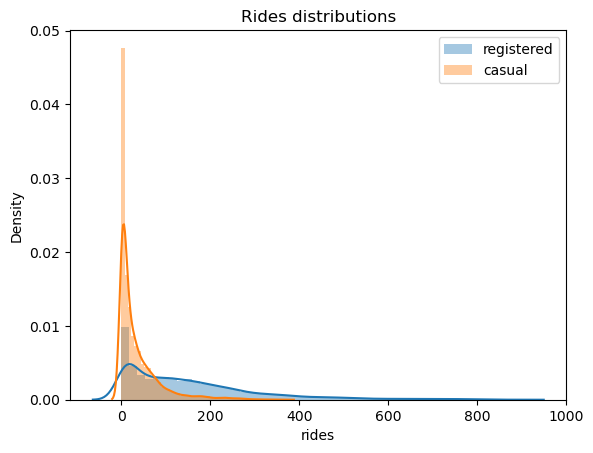

In [15]:
 # plot distributions of registered vs casual rides
sns.distplot(preprocessed_data['registered'], label='registered')
sns.distplot(preprocessed_data['casual'], label='casual')
plt.legend()
plt.xlabel('rides')
plt.title("Rides distributions")
plt.show()

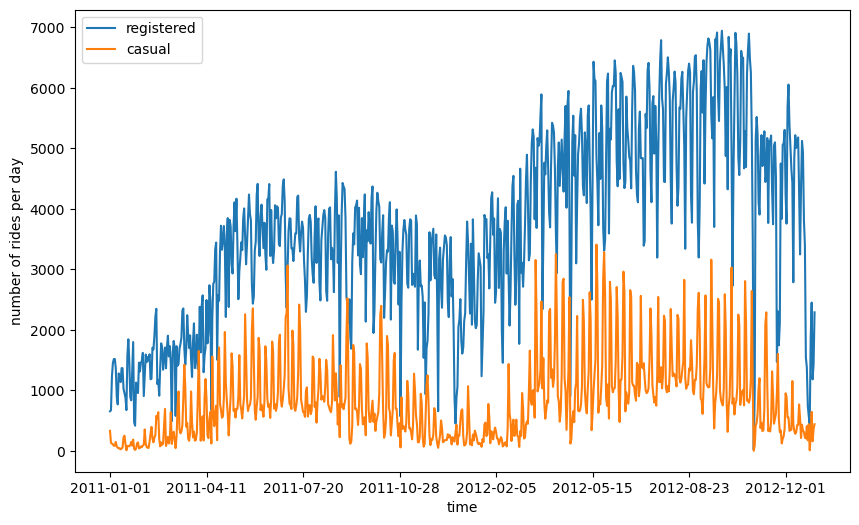

In [16]:
# plot evolution of rides over time
plot_data = preprocessed_data[['registered', 'casual', 'dteday']]
ax= plot_data.groupby('dteday').sum().plot(figsize=(10,6))
ax.set_xlabel("time");
ax.set_ylabel("number of rides per day");
# plt.show()

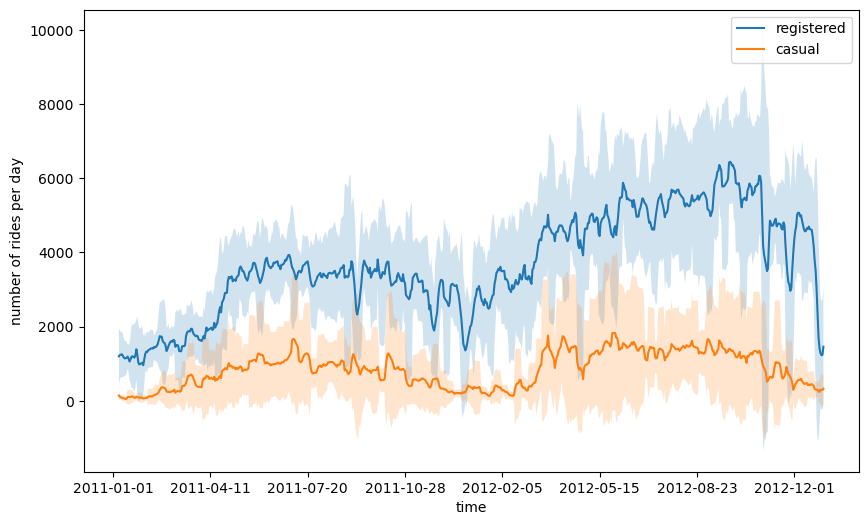

In [17]:
"""
Create new dataframe with necessary for plotting columns, and obtain 
number of rides per day, by grouping over each day
"""
plot_data = preprocessed_data[['registered', 'casual', 'dteday']]
plot_data = plot_data.groupby('dteday').sum()
"""
define window for computing the rolling mean and standard deviation
"""
window = 7
rolling_means = plot_data.rolling(window).mean()
rolling_deviations = plot_data.rolling(window).std()
"""
Create a plot of the series, where we first plot the series of rolling 
means, then we color the zone between the series of rolling means +- 2 
rolling standard deviations
"""
ax = rolling_means.plot(figsize=(10,6))
ax.fill_between(rolling_means.index, rolling_means['registered'] + 2*rolling_deviations['registered'], \
                rolling_means['registered'] - 2*rolling_deviations['registered'], alpha = 0.2)
ax.fill_between(rolling_means.index, rolling_means['casual'] + 2*rolling_deviations['casual'], \
                rolling_means['casual'] - 2*rolling_deviations['casual'], alpha = 0.2)
ax.set_xlabel("time");
ax.set_ylabel("number of rides per day");
plt.show()


C:\Users\mario\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


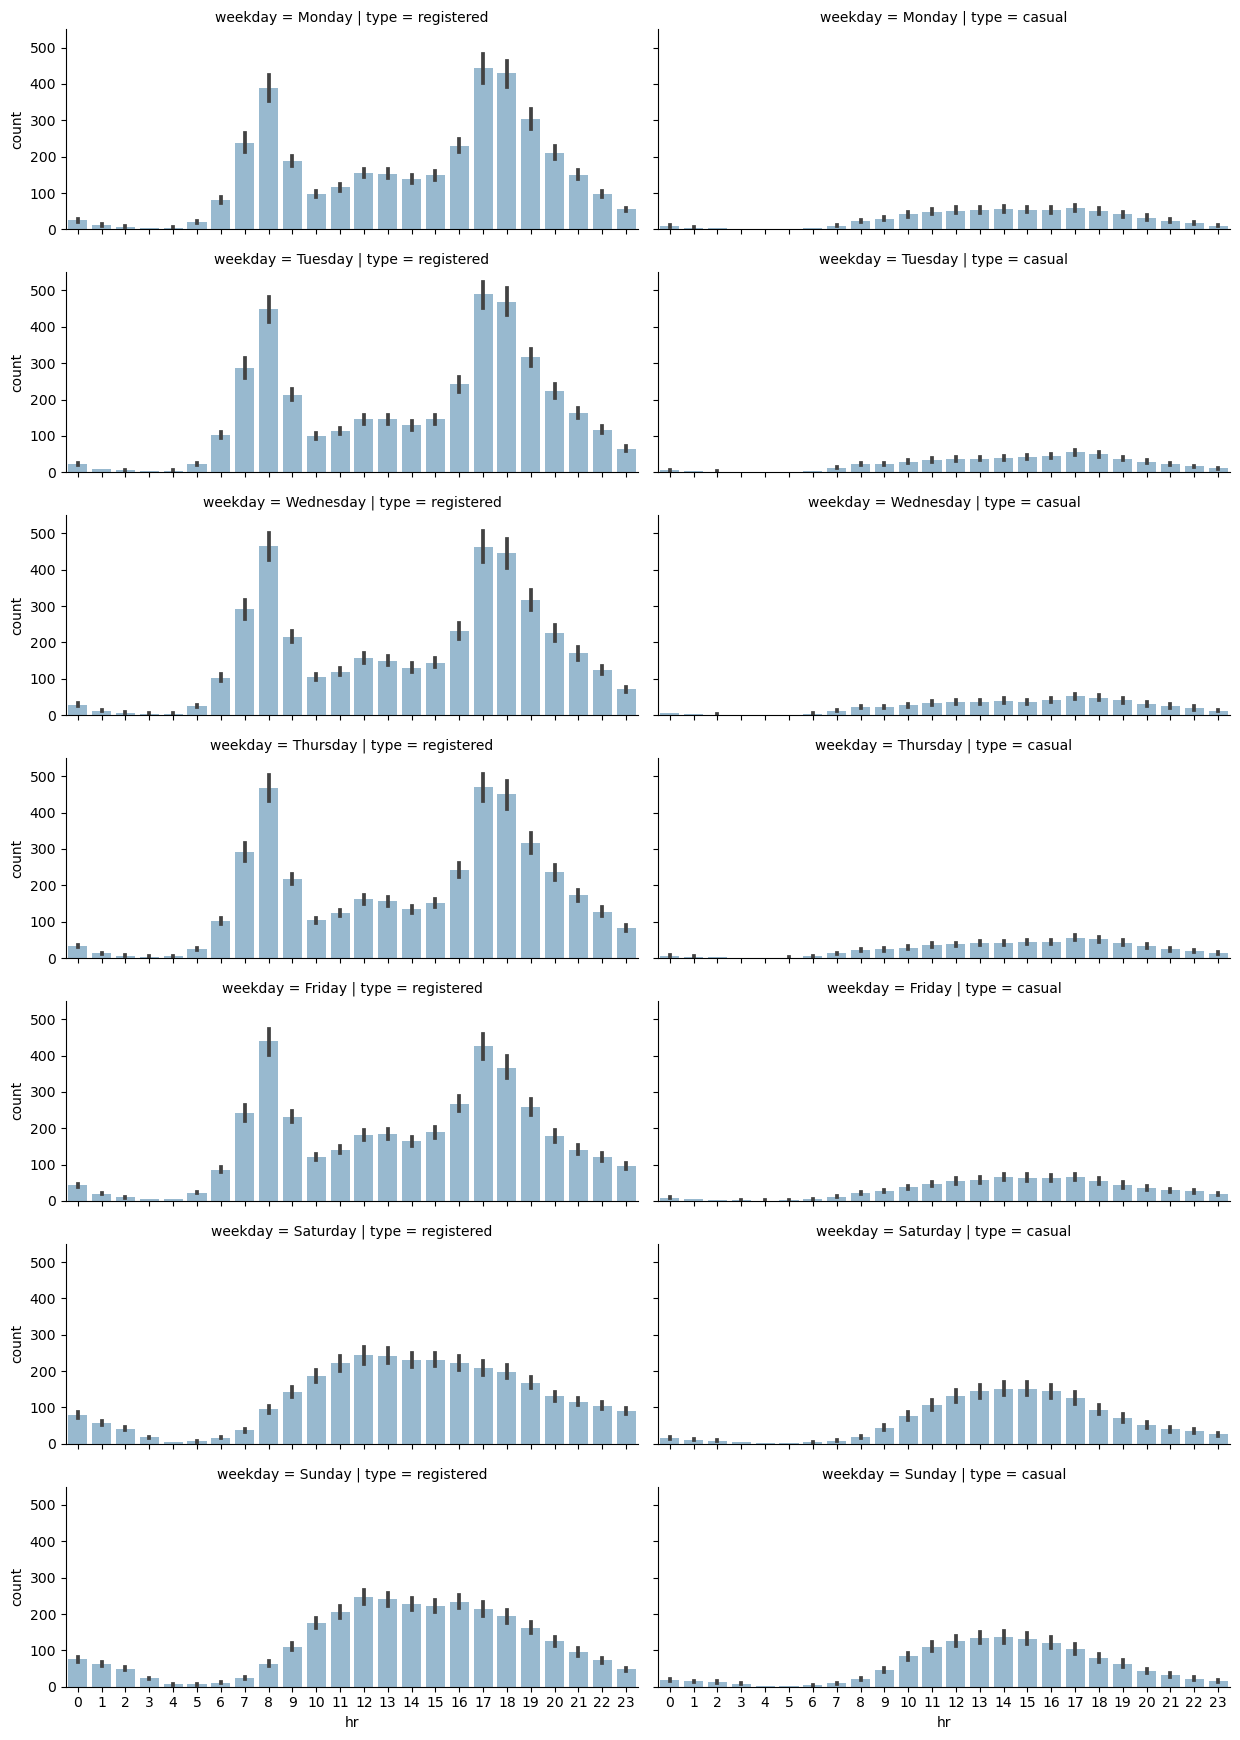

In [18]:
# select relevant columns
plot_data = preprocessed_data[['hr', 'weekday', 'registered', 'casual']]

plot_data = plot_data.melt(id_vars=['hr', 'weekday'], \
 var_name='type', value_name='count')

grid = sns.FacetGrid(plot_data, row='weekday', \
 col='type', height=2.5, aspect=2.5, \
 row_order=['Monday', 'Tuesday', \
 'Wednesday', 'Thursday', \
 'Friday', 'Saturday', 'Sunday'])
# populate the FacetGrid with the specific plots
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)

## Analyzing Seasonal Impact on Rides
    

C:\Users\mario\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


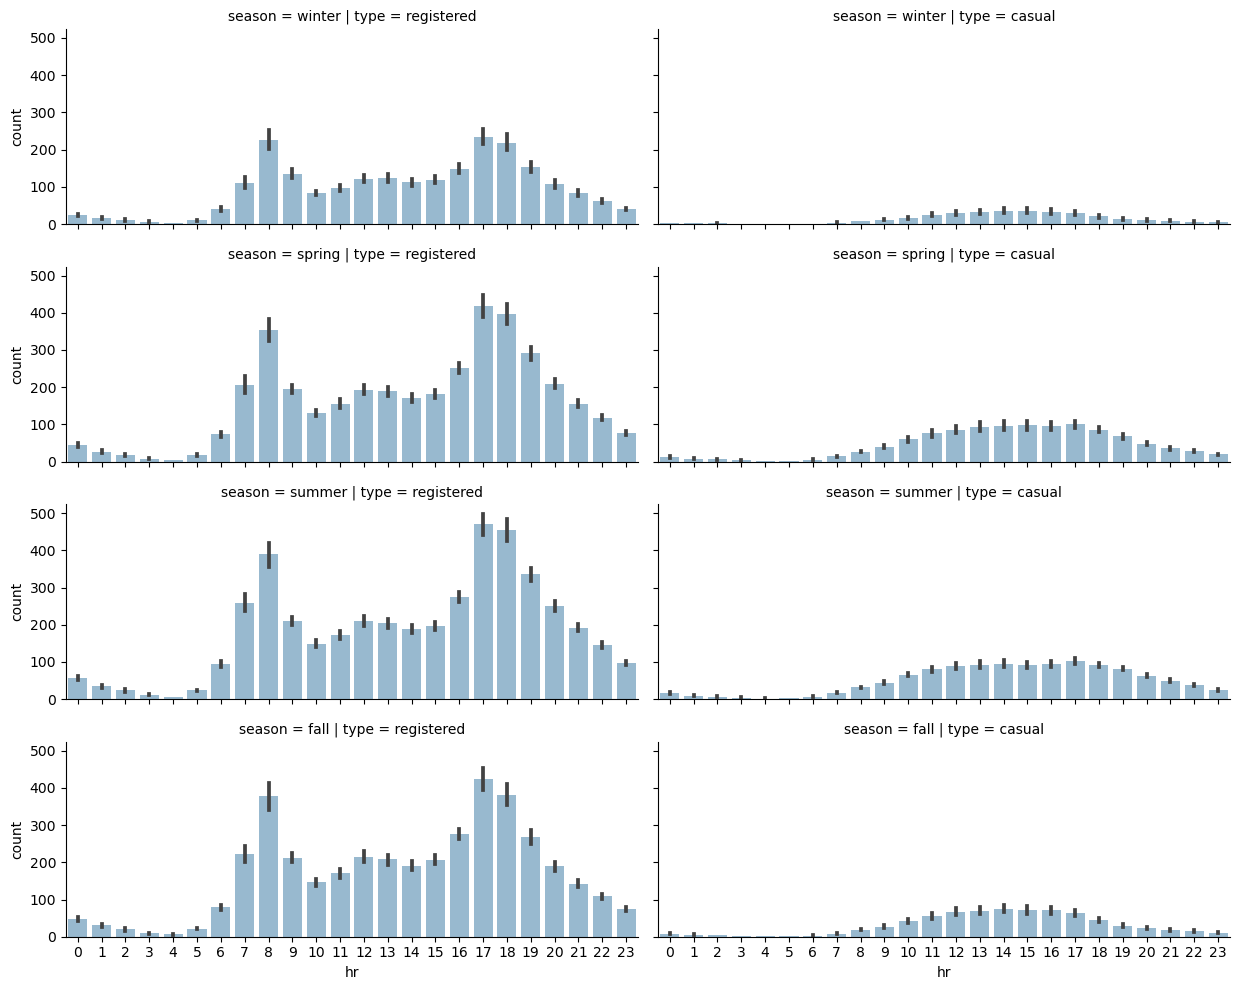

In [19]:
 # select subset of the data
plot_data = preprocessed_data[['hr', 'season','registered', 'casual']]
 # unpivot data from wide to long format
plot_data=plot_data.melt(id_vars=['hr','season'], var_name='type' ,value_name='count')
#define fact grid
grid=sns.FacetGrid(plot_data,row='season' ,col='type' , height=2.5 ,aspect=2.5 ,\
                  row_order=['winter','spring','summer','fall'])
#apply factgrid to barplot
grid.map(sns.barplot, 'hr' , 'count',alpha=0.5)

As can be seen in the plot, while each season has a similar graph shape, the 
count is lower for the winter graph. So there are fewer rides (registered and 
casual) during winter. This makes sense, as fewer rides are likely to occur when 
the weather conditions are poor.

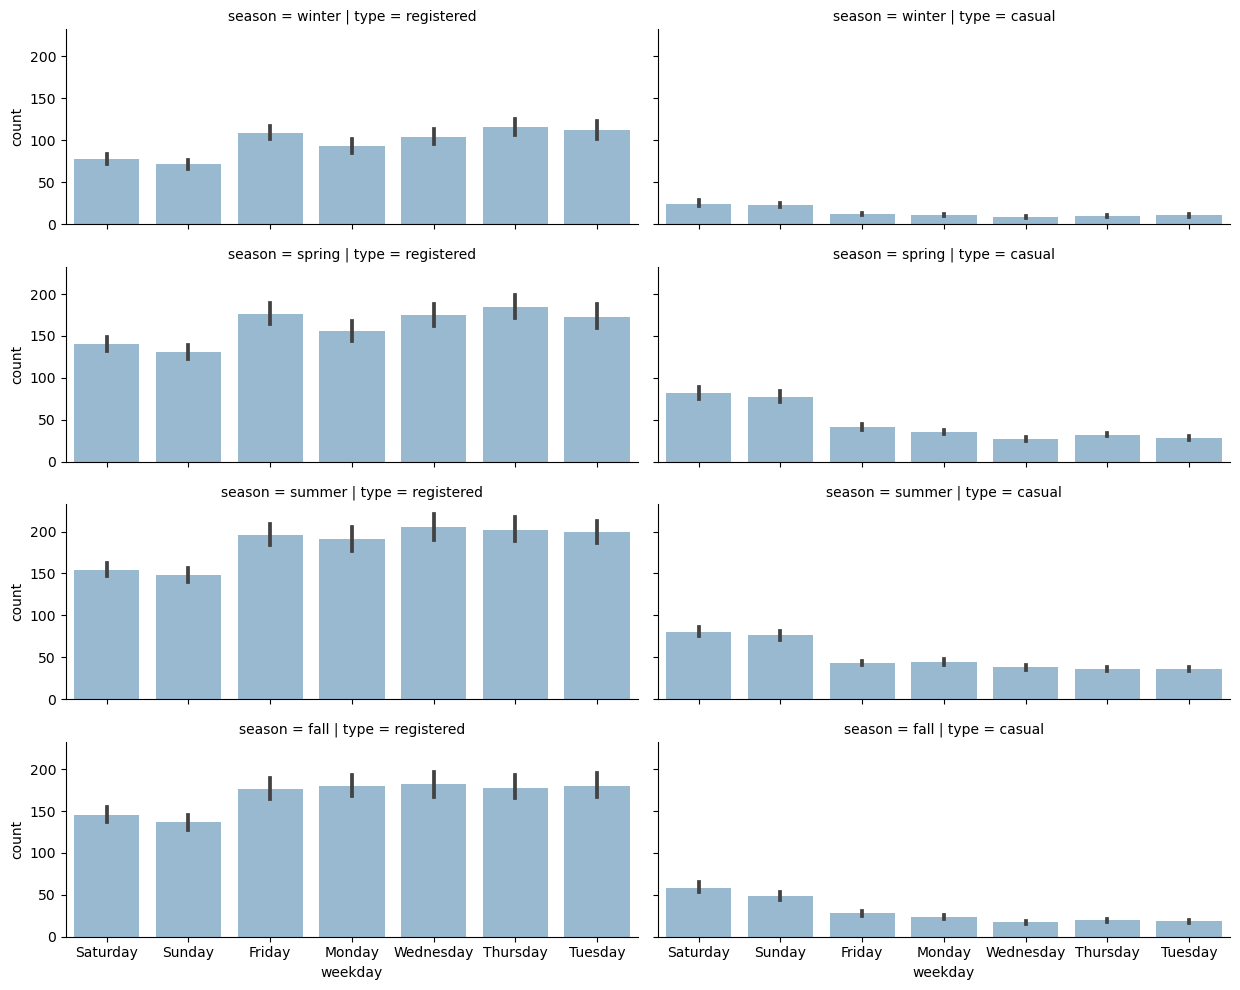

In [20]:
plot_data= preprocessed_data[['season','weekday','registered','casual']]
plot_data=plot_data.melt(id_vars=['season','weekday'],var_name='type',value_name='count')
grid=sns.FacetGrid(plot_data , row='season' ,col='type',height=2.5,aspect=2.5 ,\
                  row_order=['winter','spring','summer','fall'])
grid.map(sns.barplot,'weekday','count',alpha=0.5 ,\
         order=['Saturday','Sunday','Friday','Monday','Wednesday','Thursday','Tuesday'])

from this graph we can detect that peopel in registered don't use bike in weekends over seasons but on the other hand the casual persons use bike in there weekend

# Hypothesis Tests

In [21]:
# estimate average time for registered
population_mean=preprocessed_data['registered'].mean()
sample=preprocessed_data[(preprocessed_data['season']=='summer') & (preprocessed_data['yr']==2011)]['registered']

In [22]:
result_0=ttest_1samp(sample,population_mean)
print(f"test statistics :{result_0[0]} ,p-value:{result_0[1]}")

test statistics :-3.4919691483786197 ,p-value:0.0004887645279519505


##### here let's create with randomly 5% of data

In [23]:
sample_unbiased = preprocessed_data.registered.sample(frac=0.05)
test_result_unbiased = ttest_1samp(sample_unbiased, population_mean)

print(f"Unbiased test statistic: {test_result_unbiased[0]}, p-value: {test_result_unbiased[1]}")

Unbiased test statistic: 0.6200020224426959, p-value: 0.535419181327398


statistically significant difference between 
registered rides during working days and the weekend. Therefore, our null 
hypothesis is that the average number of rides for registered users during 
working days is the same as the average number of rides during the weekend

 H_0 : average registered rides over weekdays-average registered rides over 
weekend=0
 and 
H_a : average registered rides over weekdays-average registered rides over 
weekend≠0


In [24]:
weekend_days = ['Saturday', 'Sunday']
weekend_mask = preprocessed_data.weekday.isin(weekend_days)
workingdays_mask = ~preprocessed_data.weekday.isin(weekend_days)
 # select registered rides for the weekend and working days
weekend_data = preprocessed_data.registered[weekend_mask]
workingdays_data = preprocessed_data.registered[workingdays_mask]

In [25]:
 # perform ttest
from scipy.stats import ttest_ind
test_res = ttest_ind(weekend_data, workingdays_data)
print(f"Statistic value: {test_res[0]:.03f},p-value: {test_res[1]:.03f}")

Statistic value: -16.004,p-value: 0.000


C:\Users\mario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Registered rides distributions')

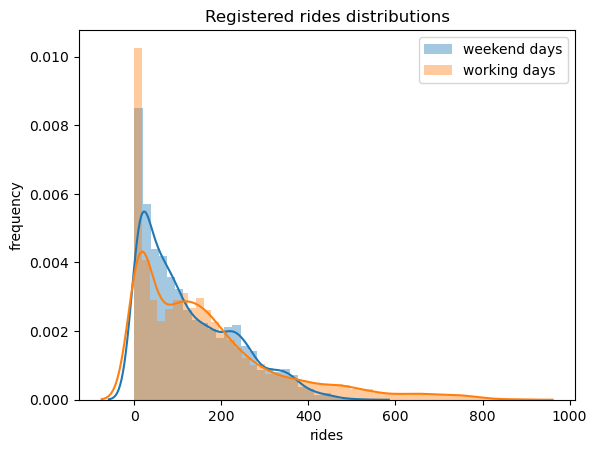

In [26]:
sns.distplot(weekend_data, label='weekend days')
sns.distplot(workingdays_data, label='working days')
plt.legend()
plt.xlabel('rides')
plt.ylabel('frequency')
plt.title("Registered rides distributions")

In [27]:
weekend_data = preprocessed_data.casual[weekend_mask]
workingdays_data = preprocessed_data.casual[workingdays_mask]
test_res = ttest_ind(weekend_data, workingdays_data)
print(f"Statistic value: {test_res[0]:.03f},p-value: {test_res[1]:.03f}")

Statistic value: 41.077,p-value: 0.000


C:\Users\mario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


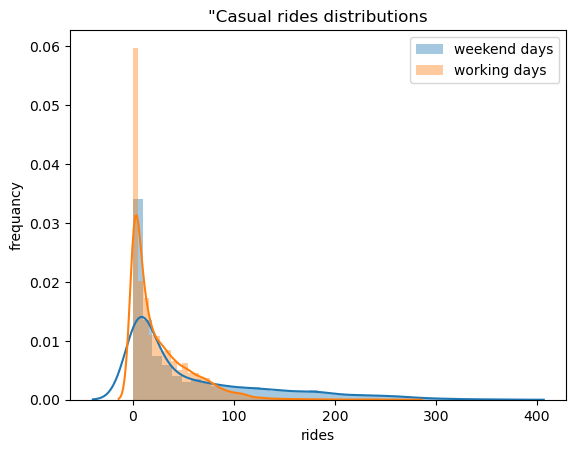

In [28]:
sns.distplot(weekend_data,label='weekend days')
sns.distplot(workingdays_data, label='working days')
plt.legend()
plt.xlabel('rides')
plt.ylabel('frequancy')
plt.title('"Casual rides distributions')
plt.show()

In conclusion, we can say that there is a statistically significant difference between  
the number of rides on working days and weekend days for both casual and  
registered customers.

# Analysis of Weather-Related Features

In [29]:
preprocessed_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,1,0,0,Saturday,0,clear,0.24,0.2879,81.0,0.0,3,13,16
1,2,2011-01-01,winter,2011,1,1,0,Saturday,0,clear,0.22,0.2727,80.0,0.0,8,32,40
2,3,2011-01-01,winter,2011,1,2,0,Saturday,0,clear,0.22,0.2727,80.0,0.0,5,27,32
3,4,2011-01-01,winter,2011,1,3,0,Saturday,0,clear,0.24,0.2879,75.0,0.0,3,10,13
4,5,2011-01-01,winter,2011,1,4,0,Saturday,0,clear,0.24,0.2879,75.0,0.0,0,1,1


In [30]:
corr_1=preprocessed_data.corr(method='spearman')

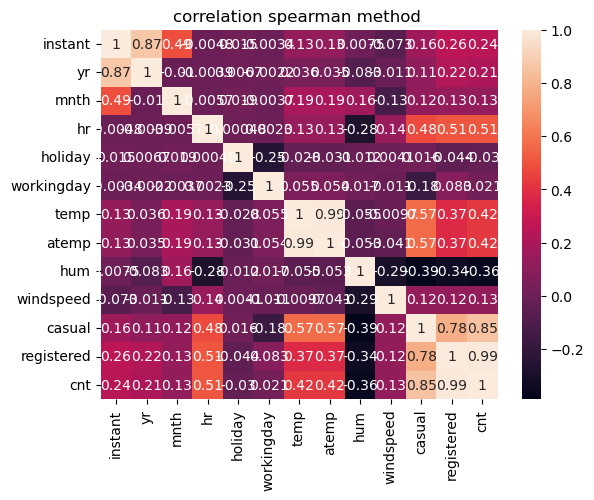

In [31]:
sns.heatmap(corr_1,annot=True)

plt.title('correlation spearman method ')
plt.show()

<AxesSubplot:xlabel='windspeed', ylabel='cnt'>

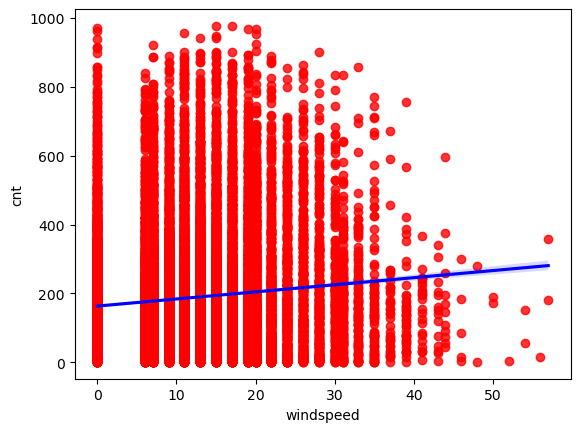

In [32]:
sns.regplot(x=preprocessed_data['windspeed'],y=preprocessed_data['cnt'],data=preprocessed_data, scatter_kws={'color':'red'},line_kws={'color':'blue'})

#### we need to know there is relationship between temp ,atemp and windspeed 

In [33]:
 # define random variables
x = np.linspace(0,5, 100)
y_lin = 0.5*x + 0.1*np.random.randn(100)
y_mon = np.exp(x) + 0.1*np.random.randn(100)

In [34]:
# compute correlations
from scipy.stats import pearsonr, spearmanr
corr_lin_pearson = pearsonr(x, y_lin)[0]
corr_lin_spearman = spearmanr(x, y_lin)[0]
corr_mon_pearson = pearsonr(x, y_mon)[0]
corr_mon_spearman = spearmanr(x, y_mon)[0]

NameError: name 'x2' is not defined

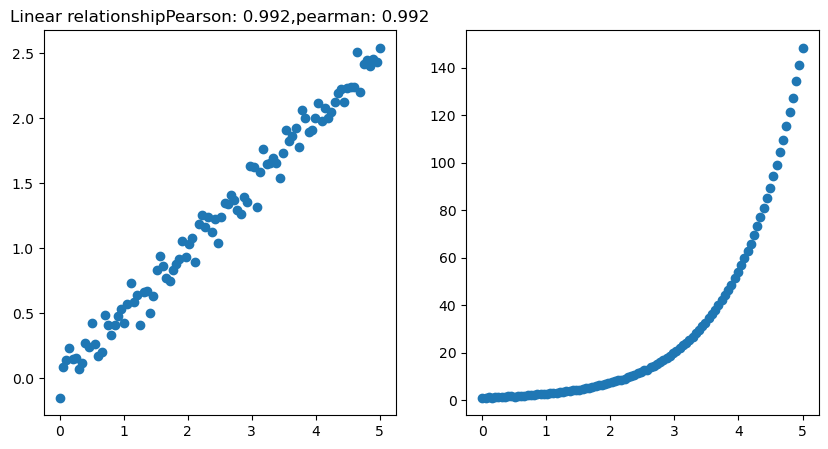

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.scatter(x, y_lin)
ax1.set_title(f"Linear relationshipPearson: {corr_lin_pearson:.3f},pearman: {corr_lin_spearman:.3f}")
ax2.scatter(x, y_mon)
x2.set_title(f"Monotonic relationshipPearson: {corr_mon_pearson:.3f}, Spearman: {corr_mon_spearman:.3f}")
plt.show()

In [36]:
correlation_matrix = preprocessed_data[['weathersit', 'casual', 'registered']].corr()
print(correlation_matrix)

              casual  registered
casual      1.000000    0.506618
registered  0.506618    1.000000


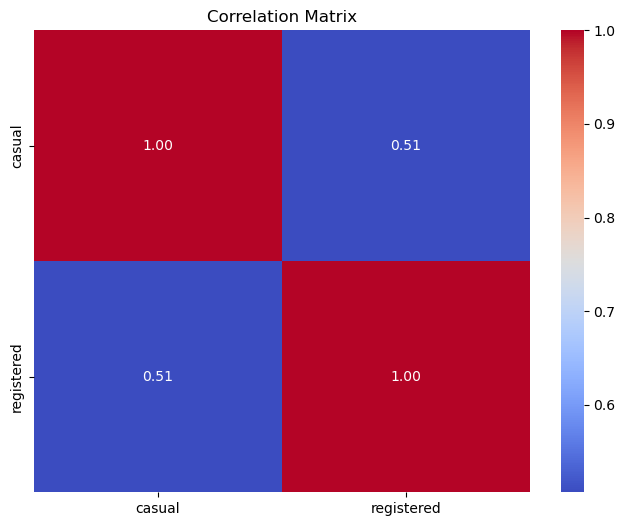

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [38]:
def compute_correlations(data, col):
    pearson_reg = pearsonr(data[col], data["registered"])[0]
    pearson_cas = pearsonr(data[col], data["causal"])[0]
    spearman_reg = spearmanr(data[col], data["registered"])[0]
    spearman_cas = spearmanr(data[col], data["causal"])[0]
    return pd.Series({"Pearson (registered)": pearson_reg,"Spearman (registered)": spearman_reg,\
                     "Pearson (causal)": pearson_cas, "Spearman (causal)": spearman_cas})
    

In [39]:
cols = ["temp", "atemp", "hum", "windspeed"]
corr_data = pd.DataFrame(index=["Pearson (registered)", \
                                "Spearman (registered)",\
                                "Pearson (causal)", \
                                "Spearman (causal)"])
for col in cols:
    corr_data[col]=compute_correlations(preprocessed_data, col)
corr_data.T

KeyError: 'causal'

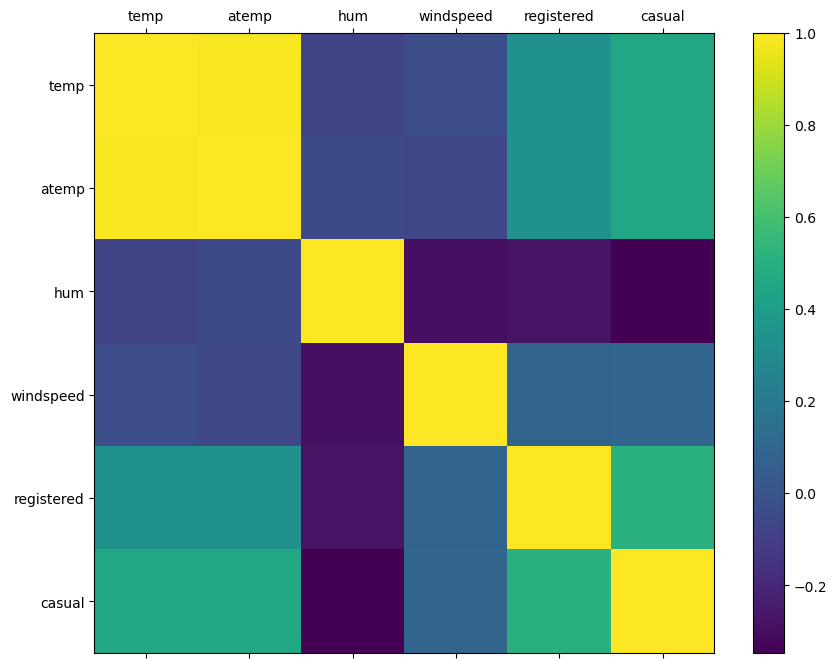

In [40]:
cols = ["temp", "atemp", "hum", "windspeed","registered", "casual"]
plot_data = preprocessed_data[cols]
corr = plot_data.corr()
fig = plt.figure(figsize=(10,8))
plt.matshow(corr, fignum=fig.number)

plt.xticks(range(len(plot_data.columns)), plot_data.columns)
plt.yticks(range(len(plot_data.columns)), plot_data.columns)
plt.colorbar()
plt.ylim([5.5, -0.5])
plt.show()